# Amazing Mazes

Générateur et solveur de labyrinthe parfait inspiré par la mythologie grecque. Met en œuvre le Retour sur trace (Recursive Backtracking) et Kruskal pour la génération, le Retour sur trace et A* pour la résolution. Comprend la visualisation ASCII/image, l'analyse de performance et des tests sur des labyrinthes jusqu'à 100 000 cellules. Projet algorithmique Python avec benchmarks comparatifs.

In [227]:
# imports

# Outils dédiés à l'analyse des données via SQL
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# tests statistiques
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np

## Les constructeurs

### Recursive Backtracking

### Kruskal

#### Principe Général
L'algorithme de Kruskal génère des labyrinthes parfaits basés sur la théorie des MST (Minimum Spanning Tree), garantissant un unique chemin entre toute paire de cellules.

#### Fonctionnement
**Préparation** : Modélisation en graphe (cellules = nœuds), génération de toutes les arêtes adjacentes, randomisation.

**Construction** : Chaque cellule forme une composante connexe. Pour chaque arête randomisée, fusion des composantes si différentes (suppression du mur), sinon conservation pour éviter les cycles. Arrêt à n-1 arêtes ajoutées.

#### Caractéristiques Majeures
**Structure Union-Find** : Compression de chemin et union par rang pour l'optimisation.

**Propriétés** : Perfection (chemin unique), connectivité totale, absence de cycles, uniformité statistique.

#### Complexité Algorithmique
Pour un labyrinthe de taille n×n :
* **E = 2n(n-1)** arêtes au maximum
* **V = n²** cellules
* **Complexité finale** : O(n² log n)

### Kurskal strict

### Kurskal optimisé

#### Principe Général
Version optimisée de Kruskal éliminant le pré-stockage de toutes les arêtes. Génération et traitement à la volée des connexions adjacentes pour réduire drastiquement l'empreinte mémoire.

#### Fonctionnement
**Préparation** : Randomisation de l'ordre des cellules (non des arêtes). Aucun stockage préalable des connexions.
**Construction** : Pour chaque cellule dans l'ordre randomisé, génération dynamique des arêtes adjacentes (maximum 2), randomisation locale, puis application du critère Union-Find. Arrêt anticipé si labyrinthe complet.

#### Différences Majeures vs Kruskal Strict
**Génération dynamique** : Arêtes créées à la demande vs stockage exhaustif initial.
**Optimisation mémoire** : O(V) vs O(V + E) - élimination du stockage des ~2n² arêtes.
**Performance** : ~5x plus rapide sur grandes instances grâce à la réduction des allocations mémoire   et du tri global.

#### Complexité Algorithmique
Pour un labyrinthe n×n : **Complexité finale** : O(n²) vs O(n² log n)

## Les solveurs

## Recursive Backtracking

L’algorithme **Recursive Backtracking** est une implémentation récursive de la **recherche en profondeur (DFS – Depth-First Search)**.  
Il est couramment utilisé dans la résolution de labyrinthes ou de problèmes combinatoires.



### Principe
1. On part du nœud de départ.  
2. On marque ce nœud comme visité et on l’ajoute au chemin courant.  
3. Si c’est la sortie, on a trouvé une solution et on arrête.  
4. Sinon, pour chaque voisin non visité :  
   - On appelle récursivement l’algorithme.  
   - Si une solution est trouvée, on remonte la pile sans revenir en arrière.  
   - Sinon, on fait un **backtrack** (on retire le nœud du chemin et on revient en arrière).  
5. Le processus continue jusqu’à ce qu’une solution soit trouvée ou que tous les chemins aient été explorés.

### Analyse, avantages et inconvénients

####  Complexité

- **Temps (pire cas)** :  
  Dans un labyrinthe de taille \( n \times n \), il y a \( n^2 \) cases.  
  Le DFS récursif (backtracking) peut donc explorer **toutes les cases** :  
  \[
  O(n^2)
  \]

- **Espace** :  
  La pile récursive peut contenir au maximum un chemin qui parcourt toutes les cases,  
  soit une profondeur maximale de \( n^2 \).  
  \[
  O(n^2)
  \]

- **Optimalité** :  
  - Ne garantit pas le chemin le plus court.  
  - Trouve **une solution valide** s’il en existe une.



####  Avantages
- Implémentation simple et élégante.  
- Naturellement adapté aux labyrinthes et puzzles.  
- Permet d’explorer toutes les solutions possibles (utile en génération de labyrinthes).  
- Faible consommation mémoire par rapport à BFS (pile récursive seulement).



#### Inconvénients
- Peut être très lent pour les grands labyrinthes (**exploration exhaustive**).  
- Risque d’exploration inutile de nombreux chemins sans issue.  






##  Algorithme A* 

###  Principe
L’algorithme **A*** est un algorithme de **recherche de chemin optimal** dans un graphe.  
Il permet, par exemple, de trouver le chemin le plus court entre l’entrée et la sortie d’un labyrinthe.

Il combine :
- Le **coût réel g(n)** : distance depuis le départ jusqu’au nœud `n`.
- Une **heuristique h(n)** : estimation de la distance entre `n` et la cible (ex. distance de Manhattan).

La fonction d’évaluation est :

```
f(n) = g(n) + h(n)
```

###  Étapes
1. Placer le nœud de départ dans une **open list** (à explorer).
2. Tant que l’open list n’est pas vide :
   - Choisir le nœud avec le **f(n) minimal**.
   - Si c’est le but → chemin trouvé .
   - Sinon :
     - Déplacer ce nœud dans la **closed list** (déjà exploré).
     - Ajouter ses voisins accessibles dans l’open list avec leurs coûts `g`, `h`, `f`.
3. Reconstruire le chemin en remontant les parents.


A* explore en privilégiant les chemins **qui semblent les plus courts vers la cible**, plutôt qu’un simple BFS.



### Analyse de la complexité

#### Complexité temporelle
Dans un labyrinthe de taille \( n \times n \), on a au maximum \( n^2 \) cases à explorer.

- **Pire cas** :  
  Si l’heuristique est mauvaise, A* peut explorer presque toutes les cases du labyrinthe :  
  \[
  O(n^2)
  \]

- **Avec une heuristique admissible et consistante** (comme la distance de Manhattan sur une grille sans diagonales) :  
  - L’algorithme explore beaucoup moins de nœuds.  
  - Le temps réel dépend de la qualité de `h(n)`.  
  - On se rapproche souvent d’un coût proportionnel à la longueur du chemin optimal.

- **Cas particuliers** :
  - Si `h(n) = 0` → A* ≡ Dijkstra, et explore toutes les cases (\( O(n^2) \)).  
  - Si `h(n)` est parfaite → A* explore seulement les cases du chemin optimal (\( O(d) \), avec \( d \) = longueur du plus court chemin).



#### Complexité spatiale
A* doit stocker :
- L’**open set** (file de priorité),
- Le **closed set** (nœuds déjà explorés),
- Les coûts `g(n)`, `f(n)` pour chaque case.

→ Dans le pire cas, cela signifie garder **presque toutes les cases du labyrinthe en mémoire** :  
\[
O(n^2)
\]



#### Avantages
- Trouve toujours le **chemin optimal** (si l’heuristique est admissible).  
- Efficace sur des grilles de grande taille avec une heuristique bien choisie.  
- Combine les avantages de Dijkstra (exactitude) et de la recherche informée (rapidité).  



#### Inconvénients
- Nécessite une bonne heuristique pour être efficace.  
- Plus coûteux en mémoire que DFS/backtracking, car il stocke beaucoup d’informations.  
- Peut se dégrader en **pire cas** et revenir à une exploration quasi exhaustive (\( O(n^2) \)).  






## Visalisations des labyrinthes et des parcours

## Analyse Comparative des Performances Algorithmiques


### Nos outils de mesures

Les métriques relevées permettent d’évaluer et de comparer les performances des algorithmes de génération de labyrinthes selon plusieurs dimensions.

Les informations d’identification assurent la traçabilité des expériences. Le champ `timestamp` enregistre la date et l’heure d’exécution, `filename` conserve le nom du fichier produit, `maze_size` indique la taille du labyrinthe, `seed` permet de reproduire la même génération, et `algorithm` identifie la méthode utilisée. Ces données garantissent la reproductibilité et facilitent le suivi de chaque test.

Les mesures de performance permettent de comparer l’efficacité temporelle et mémoire des algorithmes. La valeur `generation_time_ms` exprime la durée totale d’exécution en millisecondes, tandis que `ram_peak_mb` donne une estimation de la consommation mémoire maximale observée. Le champ `file_size_bytes` enregistre la taille finale du fichier ASCII produit, ce qui permet d’évaluer l’impact du stockage en fonction de la dimension du labyrinthe.

Des métriques spécifiques apportent un éclairage complémentaire selon l’algorithme étudié. Pour le backtracking récursif, `backtrack_count` mesure le nombre de retours en arrière effectués, traduisant la complexité de l’exploration. Pour Kruskal, `edges_processed` quantifie le nombre d’arêtes considérées, ce qui permet de comparer directement la version stricte et la version optimisée. Enfin, `union_find_operations` rend compte du nombre d’opérations internes de la structure Union-Find, indicateur de la charge algorithmique dans l’exécution de Kruskal.

L’ensemble de ces métriques permet de comparer les algorithmes sous trois angles complémentaires : la rapidité d’exécution, l’efficacité mémoire et la complexité pratique de leur mise en œuvre. Elles fournissent ainsi une base solide pour analyser les différences de performances entre le backtracking récursif, Kruskal strict et Kruskal optimisé.


### Les fichiers csv générés

**solver_metrics.csv** : Métriques d'évaluation des performances des algorithmes de résolution

**constructor_metrics.csv** : Métriques d'évaluation des performances des algorithmes de génération

### Liste des Labyrinthes Générés 

**Algorithme de Kruskal**
* 100 labyrinthes avec n=10, seeds de 1 à 100
* 100 labyrinthes avec n=20, seeds de 1 à 100
* 100 labyrinthes avec n=30, seeds de 1 à 100
* 99 labyrinthes avec n=40, seeds de 1 à 65 et 67 à 100
* 100 labyrinthes avec n=50, seeds de 1 à 100
* 50 labyrinthes avec n=100, seeds de 1 à 50
* 50 labyrinthes avec n=500, seeds de 1 à 50
* 50 labyrinthes avec n=1000, seeds de 1 à 50
* 20 labyrinthes avec n=5000, seeds de 1 à 20
* 5 labyrinthes avec n=6000, seeds de 66, 28, 150, 1 et 98

**Algorithme de Dfs**
* 100 labyrinthes avec n=10, seeds de 1 à 100
* 100 labyrinthes avec n=20, seeds de 1 à 100
* 100 labyrinthes avec n=30, seeds de 1 à 100
* 98 labyrinthes avec n=40, seeds de 1 à 65, 67 à 70 et 72 à 100 

In [228]:
df= pd.read_csv("constructors_metrics.csv")

df_counting = duckdb.sql(""" select
sum(case when maze_size = 10 and algorithm= 'kruskal' then 1 else 0 end) as Kruskal_10,
sum(case when maze_size = 10 and algorithm= 'recursive_backtracking' then 1 else 0 end) as Dfs_10,
sum(case when maze_size = 20 and algorithm= 'kruskal' then 1 else 0 end) as Kruskal_20,
sum(case when maze_size = 20 and algorithm= 'recursive_backtracking' then 1 else 0 end) as Dfs_20,
sum(case when maze_size = 30 and algorithm= 'kruskal' then 1 else 0 end) as Kruskal_30,
sum(case when maze_size = 30 and algorithm= 'recursive_backtracking' then 1 else 0 end) as Dfs_30,
sum(case when maze_size = 40 and algorithm= 'kruskal' then 1 else 0 end) as Kruskal_40,
sum(case when maze_size = 40 and algorithm= 'recursive_backtracking' then 1 else 0 end) as Dfs_40,
sum(case when maze_size = 50 and algorithm= 'kruskal' then 1 else 0 end) as Kruskal_50,
sum(case when maze_size = 100 and algorithm= 'kruskal' then 1 else 0 end) as Kruskal_100,
sum(case when maze_size = 500 and algorithm= 'kruskal' then 1 else 0 end) as Kruskal_500,
sum(case when maze_size = 1000 and algorithm= 'kruskal' then 1 else 0 end) as Kruskal_1000,
sum(case when maze_size = 5000 and algorithm= 'kruskal' then 1 else 0 end) as Kruskal_5000,
sum(case when maze_size = 6000 and algorithm= 'kruskal' then 1 else 0 end) as Kruskal_6000
from df """).df()

df_counting

,Kruskal_10,Dfs_10,Kruskal_20,Dfs_20,Kruskal_30,Dfs_30,Kruskal_40,Dfs_40,Kruskal_50,Kruskal_100,Kruskal_500,Kruskal_1000,Kruskal_5000,Kruskal_6000
0,100.0,100.0,0.0,0.0,0.0,0.0,99.0,98.0,100.0,100.0,50.0,50.0,20.0,5.0


## Recherche outliers

#### DFS

In [229]:
# création data frame dfs taille 10
df= pd.read_csv("constructors_metrics.csv")
df_recursive_maze_10 = duckdb.sql("""
SELECT * 
FROM df 
where maze_size = 10 and algorithm= 'recursive_backtracking'
""").df()

In [230]:
# Création data frame dfs taille 40
df= pd.read_csv("constructors_metrics.csv")
df_recursive_maze_40 = duckdb.sql("""
SELECT * 
FROM df 
where maze_size = 40 and algorithm= 'recursive_backtracking'
""").df()

#### Vérification des corrélations potentielles avec les autres métriques

In [231]:
# Vérification pour Dfs 10
# temps max
max_time = duckdb.sql("""
    SELECT *,
      'max_time'as metric
      from df_recursive_maze_10
        where generation_time_ms = (select max(generation_time_ms) FROM df_recursive_maze_10)""").df()



# max operations
max_ops = duckdb.sql("""
    SELECT *,
      'max_ops'as metric
    from df_recursive_maze_10
    where backtrack_count = (select max(backtrack_count) FROM df_recursive_maze_10)""").df()

result = duckdb.sql(""" 
    select * from max_time
    union all
    select * from max_ops
    """).df()

result

,timestamp,filename,maze_size,seed,algorithm,generation_time_ms,ram_peak_mb,file_size_bytes,backtrack_count,edges_processed,union_find_operations,metric
0,2025-09-17 19:13:21,recursive_maze_10_50,10.0,50.0,recursive_backtracking,9.92,17.68,483.0,12.0,99.0,0.0,max_time
1,2025-09-17 19:13:21,recursive_maze_10_43,10.0,43.0,recursive_backtracking,1.63,17.68,483.0,14.0,99.0,0.0,max_ops


In [232]:
# Vérifiaction pour Dfs 40
# temps max
max_time = duckdb.sql("""
    SELECT *,
      'max_time'as metric
      from df_recursive_maze_40
        where generation_time_ms = (select max(generation_time_ms) FROM df_recursive_maze_40)""").df()



# max operations
max_ops = duckdb.sql("""
    SELECT *,
      'max_ops'as metric
    from df_recursive_maze_40
    where backtrack_count = (select max(backtrack_count) FROM df_recursive_maze_40)""").df()

result = duckdb.sql(""" 
    select * from max_time
    union all
    select * from max_ops
    """).df()

result

,timestamp,filename,maze_size,seed,algorithm,generation_time_ms,ram_peak_mb,file_size_bytes,backtrack_count,edges_processed,union_find_operations,metric
0,2025-09-17 19:21:28,recursive_maze_40_65,40.0,65.0,recursive_backtracking,31.9,18.27,6723.0,157.0,1599.0,0.0,max_time
1,2025-09-17 19:26:54,recursive_maze_40_79,40.0,79.0,recursive_backtracking,12.3,18.26,6723.0,177.0,1599.0,0.0,max_ops


### Kruskal

In [233]:
# Création dataframe Kruskal 10
df= pd.read_csv("constructors_metrics.csv")
df_kruskal_10= duckdb.sql("""
SELECT * 
FROM df 
where maze_size = 10 and algorithm= 'kruskal'
""").df()

In [234]:
# Création dataframe Kruskal 20
df= pd.read_csv("constructors_metrics.csv")
df_kruskal_20= duckdb.sql("""
SELECT * 
FROM df 
where maze_size = 20 and algorithm= 'kruskal'
""").df()

In [235]:
# Création dataframe Kruskal 50
df= pd.read_csv("constructors_metrics.csv")
df_kruskal_50 = duckdb.sql("""
SELECT * 
FROM df 
where maze_size = 50 and algorithm= 'kruskal'
""").df()

In [236]:
# Création dataframe Kruskal 1000
df= pd.read_csv("constructors_metrics.csv")
df_kruskal_1000 = duckdb.sql("""
SELECT * 
FROM df 
where maze_size = 1000 and algorithm= 'kruskal'
""").df()

### Vérification des corrélations potentielles avec les autres métriques

In [237]:
# Vérification sur Kruskal 10
# temps max
max_time = duckdb.sql("""
    SELECT *,
      'max_time'as metric
      from df_kruskal_10
        where generation_time_ms = (select max(generation_time_ms) FROM df_kruskal_10)""").df()

# max operations
max_ops = duckdb.sql("""
    SELECT *,
      'max_ops'as metric
    from df_kruskal_50
    where union_find_operations = (select max(union_find_operations) FROM df_kruskal_10)""").df()

result = duckdb.sql(""" 
    select * from max_time
    union all
    select * from max_ops
    """).df()

result

,timestamp,filename,maze_size,seed,algorithm,generation_time_ms,ram_peak_mb,file_size_bytes,backtrack_count,edges_processed,union_find_operations,metric
0,2025-09-16 19:01:40,kruskal_strict_10_3.txt,10.0,3.0,kruskal,15.33,17.99,483.0,0.0,180.0,639.0,max_time


In [238]:
# Vérification sur Kruskal 20
# temps max
max_time = duckdb.sql("""
    SELECT *,
      'max_time'as metric
      from df_kruskal_20
        where generation_time_ms = (select max(generation_time_ms) FROM df_kruskal_20)""").df()

# max operations
max_ops = duckdb.sql("""
    SELECT *,
      'max_ops'as metric
    from df_kruskal_20
    where union_find_operations = (select max(union_find_operations) FROM df_kruskal_20)""").df()

result = duckdb.sql(""" 
    select * from max_time
    union all
    select * from max_ops
    """).df()

result

,timestamp,filename,maze_size,seed,algorithm,generation_time_ms,ram_peak_mb,file_size_bytes,backtrack_count,edges_processed,union_find_operations,metric


In [239]:
# Vérification sur Kruskal 50
# temps max
max_time = duckdb.sql("""
    SELECT *,
      'max_time'as metric
      from df_kruskal_50
        where generation_time_ms = (select max(generation_time_ms) FROM df_kruskal_50)""").df()

# max operations
max_ops = duckdb.sql("""
    SELECT *,
      'max_ops'as metric
    from df_kruskal_50
    where union_find_operations = (select max(union_find_operations) FROM df_kruskal_50)""").df()

result = duckdb.sql(""" 
    select * from max_time
    union all
    select * from max_ops
    """).df()

result

,timestamp,filename,maze_size,seed,algorithm,generation_time_ms,ram_peak_mb,file_size_bytes,backtrack_count,edges_processed,union_find_operations,metric
0,2025-09-16 19:01:40,kruskal_strict_50_17.txt,50.0,17.0,kruskal,47.26,18.96,10403.0,0.0,4900.0,20906.0,max_time
1,2025-09-16 19:01:41,kruskal_strict_50_86.txt,50.0,86.0,kruskal,10.41,18.97,10403.0,0.0,4900.0,21611.0,max_ops


In [240]:
# Vérification sur Kruskal 1000
# temps max
max_time = duckdb.sql("""
    SELECT *,
      'max_time'as metric
      from df_kruskal_1000
        where generation_time_ms = (select max(generation_time_ms) FROM df_kruskal_1000)""").df()

# max ram
max_ram = duckdb.sql("""
    SELECT *,
      'max_ram'as metric
    from df_kruskal_1000
    where ram_peak_mb = (select max(ram_peak_mb) FROM df_kruskal_1000)""").df()

# max operations
max_ops = duckdb.sql("""
    SELECT *,
      'max_ops'as metric
    from df_kruskal_1000
    where union_find_operations = (select max(union_find_operations) FROM df_kruskal_1000)""").df()

result = duckdb.sql(""" 
    select * from max_time
    union all
    select * from max_ram
    union all
    select * from max_ops
    """).df()

result

,timestamp,filename,maze_size,seed,algorithm,generation_time_ms,ram_peak_mb,file_size_bytes,backtrack_count,edges_processed,union_find_operations,metric
0,2025-09-16 19:14:33,kruskal_strict_1000_39.txt,1000.0,39.0,kruskal,198485.63,294.39,4008003.0,0.0,1998000.0,8807356.0,max_time
1,2025-09-16 19:11:22,kruskal_strict_1000_16.txt,1000.0,16.0,kruskal,8018.94,298.02,4008003.0,0.0,1998000.0,8720812.0,max_ram
2,2025-09-16 19:11:05,kruskal_strict_1000_14.txt,1000.0,14.0,kruskal,8073.97,296.01,4008003.0,0.0,1998000.0,8922923.0,max_ops


#### Traitement: les outliers generation_time_ms sont fixés à la moyenne de generation_time_ms 

In [241]:
df_clean = duckdb.sql("""
SELECT 
    filename,
    algorithm,
    union_find_operations, 
    timestamp,
    maze_size,
    CASE 
        WHEN filename = 'kruskal_strict_20_5.txt' THEN 
            (SELECT mean(generation_time_ms) FROM df WHERE maze_size = 20 AND algorithm = 'kruskal')
        WHEN filename = 'kruskal_strict_10_3.txt' THEN 
            (SELECT mean(generation_time_ms) FROM df WHERE maze_size = 10 AND algorithm = 'kruskal')
        WHEN filename = 'kruskal_strict_1000_39.txt' THEN 
            (SELECT mean(generation_time_ms) FROM df WHERE maze_size = 1000 AND algorithm = 'kruskal')
        WHEN filename = 'recursive_maze_10_50' THEN 
            (SELECT mean(generation_time_ms) FROM df WHERE maze_size = 10 AND algorithm = 'recursive_backtracking')
        WHEN filename = 'recursive_maze_40_65' THEN 
            (SELECT mean(generation_time_ms) FROM df WHERE maze_size = 40 AND algorithm = 'recursive_backtracking')
        ELSE generation_time_ms
    END as generation_time_ms
FROM df
""").df()

### Analyse des outliers

#### Observations
Les pics de RAM les plus importants sont toujours sur les derniers enregistrements d'une série pour Kruskal et Recursive Backtracking.

#### Outliers détectés
**Kruskal** (3 outliers) : Kruskal_10 (15.33 ms), Kruskal_50 (47.26 ms), Kruskal_1000 (198,485.63 ms)

**Recursive Backtracking** (2 outliers) : Recursive_maze_40 (31.9 ms), Recursive_maze_10 (9.92 ms)

#### Traitement
Nous n'avons constaté aucune corrélation entre ces temps d'exécution excessifs et les autres métriques. L'origine des outliers n'étant pas expliquée, remplacement par la moyenne de generation_time_ms.

## Visualisation
### Analyse des Formes de Courbes : Kruskal vs Recursive Backtracking

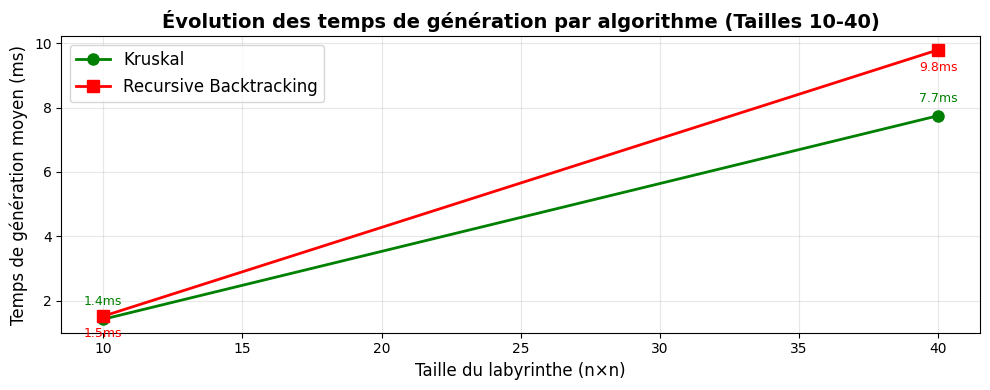

In [242]:
# Calcul des moyennes par taille et algorithme (tailles 10 à 40 inclus)
moyennes = duckdb.sql("""
SELECT 
    algorithm,
    maze_size,
    AVG(generation_time_ms) as avg_time
FROM df_clean
WHERE maze_size >= 10 AND maze_size <= 40
GROUP BY algorithm, maze_size
ORDER BY algorithm, maze_size
""").df()

# Séparation des données par algorithme
kruskal = moyennes[moyennes['algorithm'] == 'kruskal']
dfs = moyennes[moyennes['algorithm'] == 'recursive_backtracking']

# Création du graphique
plt.figure(figsize=(10, 4))

plt.plot(kruskal['maze_size'], kruskal['avg_time'], 
         'o-', linewidth=2, markersize=8, label='Kruskal', color='green')
plt.plot(dfs['maze_size'], dfs['avg_time'], 
         's-', linewidth=2, markersize=8, label='Recursive Backtracking', color='red')

plt.xlabel('Taille du labyrinthe (n×n)', fontsize=12)
plt.ylabel('Temps de génération moyen (ms)', fontsize=12)
plt.title('Évolution des temps de génération par algorithme (Tailles 10-40)', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Affichage des valeurs sur les points
for i, row in kruskal.iterrows():
    plt.annotate(f'{row["avg_time"]:.1f}ms', 
                (row['maze_size'], row['avg_time']), 
                textcoords="offset points", xytext=(0,10), ha='center', 
                fontsize=9, color='green')

for i, row in dfs.iterrows():
    plt.annotate(f'{row["avg_time"]:.1f}ms', 
                (row['maze_size'], row['avg_time']), 
                textcoords="offset points", xytext=(0,-15), ha='center', 
                fontsize=9, color='red')

plt.tight_layout()
plt.show()


### Evolution de du temps de génération pour Kruskal

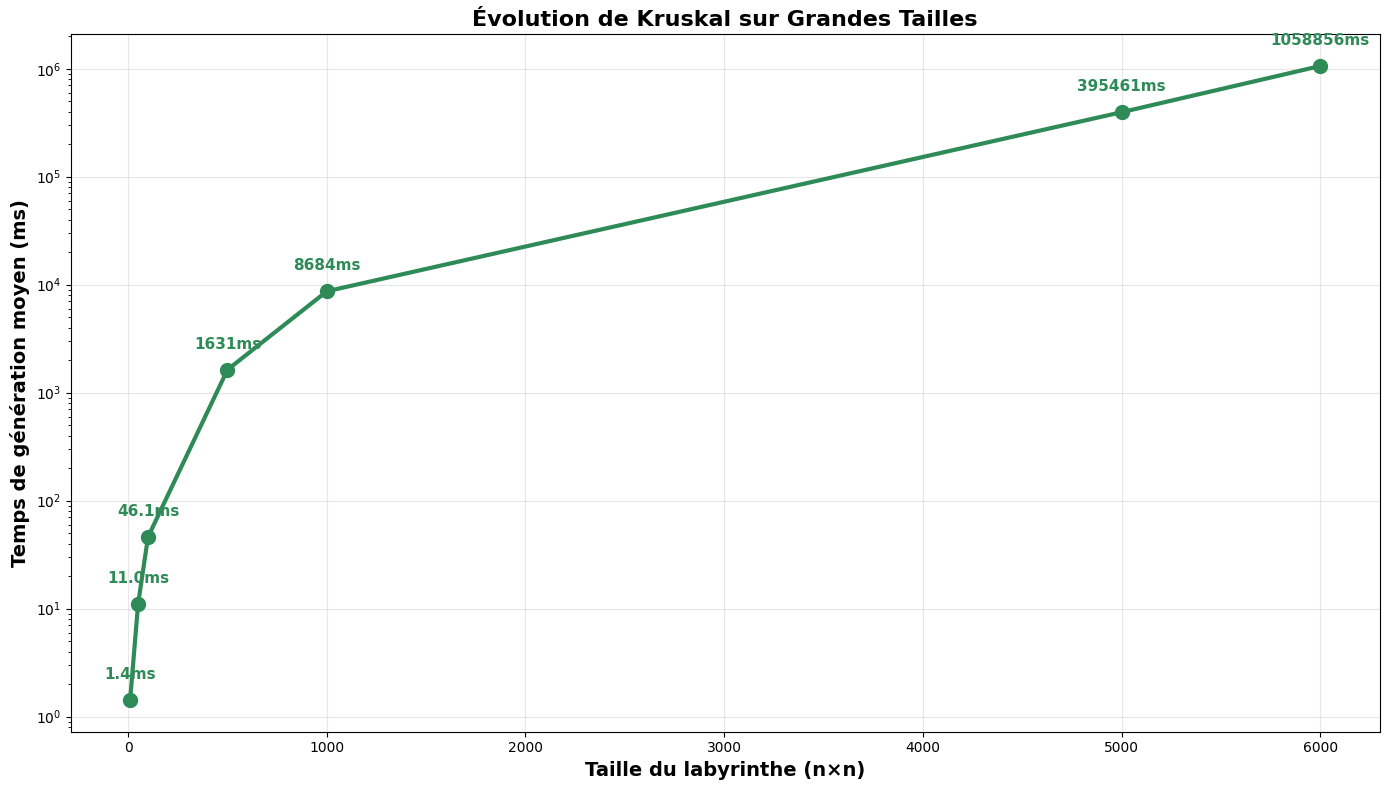

In [243]:
# Calcul des moyennes pour Kruskal uniquement sur les tailles spécifiées
moyennes_kruskal = duckdb.sql("""
SELECT 
    maze_size,
    AVG(generation_time_ms) as avg_time
FROM df_clean
WHERE algorithm = 'kruskal' 
AND maze_size IN (10, 50, 100, 500, 1000, 5000, 6000)
GROUP BY maze_size
ORDER BY maze_size
""").df()

# Création du graphique
plt.figure(figsize=(14, 8))

plt.plot(moyennes_kruskal['maze_size'], moyennes_kruskal['avg_time'], 
         'o-', linewidth=3, markersize=10, label='Kruskal O(n² log n)', color='#2E8B57')

plt.xlabel('Taille du labyrinthe (n×n)', fontsize=14, fontweight='bold')
plt.ylabel('Temps de génération moyen (ms)', fontsize=14, fontweight='bold')
plt.title('Évolution de Kruskal sur Grandes Tailles', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)

# Échelle logarithmique sur l'axe Y pour mieux visualiser la progression
plt.yscale('log')

# Affichage des valeurs sur les points
for i, row in moyennes_kruskal.iterrows():
    if row['avg_time'] < 100:
        plt.annotate(f'{row["avg_time"]:.1f}ms', 
                    (row['maze_size'], row['avg_time']), 
                    textcoords="offset points", xytext=(0,15), ha='center', 
                    fontsize=11, fontweight='bold', color='#2E8B57')
    else:
        plt.annotate(f'{row["avg_time"]:.0f}ms', 
                    (row['maze_size'], row['avg_time']), 
                    textcoords="offset points", xytext=(0,15), ha='center', 
                    fontsize=11, fontweight='bold', color='#2E8B57')

plt.tight_layout()
plt.show()

### Cohérences Observées

**Formes des courbes** :
- **Kruskal** (vert) : Courbe légèrement concave, caractéristique d'une croissance O(n² log n)
- **DFS** (rouge) : Courbe plus linéaire sur cette échelle, typique d'une croissance O(n²)

**Évolution des écarts** :
- À n=10 : Quasi-égalité (1.4ms vs 1.5ms)
- À n=20 : Écart qui se creuse (2.3ms vs 2.8ms)
- À n=30 : Divergence marquée (4.1ms vs 6.5ms)
- À n=40 : Écart maximal mais qui se stabilise relativement (7.7ms vs 9.8ms)

**Points remarquables** :
- Le **croisement initial** où DFS est légèrement plus lent dès n=10
- La **divergence progressive** qui s'accentue jusqu'à n=30
- La **stabilisation relative** à n=40, suggérant que l'écart proportionnel se maintient

#### Conclusion

Cette visualisation illustre parfaitement le paradoxe théorie/pratique : Kruskal, malgré sa complexité O(n² log n) supérieure, reste constamment plus performant que DFS O(n²) sur toute la plage testée. Les formes des courbes valident les complexités théoriques, mais révèlent l'impact déterminant des constantes cachées et des optimisations d'implémentation en algorithmique pratique.

## Analyse Comparative des Performances Algorithmiques


In [245]:
# Chargement du fichier CSV
file_path = "solver_metrics.csv" 
df_solver = pd.read_csv(file_path)

### Aperçu des données

In [ ]:

df_solver.head()


,timestamp,maze_name,maze_size,algorithm,solve_time_ms,ram_peak_mb,file_size_bytes,nodes_explored,path_length
0,2025-09-18 08:03:38,recursive_maze_10_1,21x21,dfs,5.26,21.79,0,117,111
1,2025-09-18 08:03:38,recursive_maze_10_1,21x21,astar,0.94,21.82,0,140,111
2,2025-09-18 08:03:38,recursive_maze_10_2,21x21,dfs,0.66,21.85,0,141,135
3,2025-09-18 08:03:38,recursive_maze_10_2,21x21,astar,0.86,21.85,0,166,135
4,2025-09-18 08:03:38,recursive_maze_10_3,21x21,dfs,0.31,21.86,0,89,87


##  Statistiques descriptives

In [ ]:
# Conversion en secondes pour plus de lisibilité
df_solver["solve_time_s"] = df_solver["solve_time_ms"] / 1000

#### Statistiques globales

In [ ]:
# Colonnes numériques pertinentes
cols = ["solve_time_ms", "ram_peak_mb", "file_size_bytes", "nodes_explored", "path_length"]

# Statistiques descriptives
df_solver[cols].describe()


,solve_time_ms,ram_peak_mb,file_size_bytes,nodes_explored,path_length
count,1.297000e+03,1297.000000,1.297000e+03,1.297000e+03,1297.000000
mean,4.336090e+03,26.205698,6.180421e+03,1.110893e+04,475.341557
std,6.777985e+04,14.971983,1.573278e+05,8.043651e+04,954.080907
min,1.500000e-01,21.600000,0.000000e+00,4.300000e+01,0.000000
25%,7.200000e-01,22.250000,0.000000e+00,1.310000e+02,75.000000
50%,1.215000e+01,24.280000,0.000000e+00,1.287000e+03,291.000000
75%,3.405000e+01,25.240000,0.000000e+00,2.711000e+03,547.000000
max,1.643543e+06,317.880000,4.008003e+06,1.747851e+06,13215.000000


###  Corrélations entre variables numériques

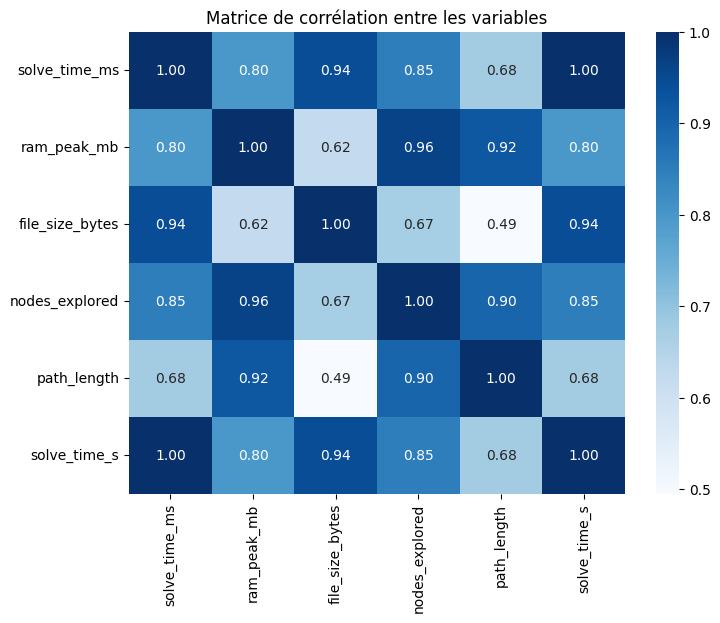

In [ ]:

corr = df_solver.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Matrice de corrélation entre les variables")
plt.show()

# Interprétation de la matrice de corrélation

La matrice de corrélation met en évidence les relations entre différentes variables mesurées lors de la résolution des labyrinthes.

##  Corrélations fortes
- **solve_time_ms ↔ file_size_bytes (r = 0.94)**  
  → Plus le fichier du labyrinthe est grand, plus le temps de résolution est long.  
- **solve_time_ms ↔ nodes_explored (r = 0.85)**  
  → Plus de nœuds explorés implique un temps de résolution plus élevé.  
- **ram_peak_mb ↔ nodes_explored (r = 0.96)**  
  → La mémoire consommée est directement liée au nombre de nœuds explorés.  
- **ram_peak_mb ↔ path_length (r = 0.92)**  
  → Plus le chemin est long, plus la mémoire utilisée augmente.  

##  Corrélations modérées
- **solve_time_ms ↔ path_length (r = 0.68)**  
  → La longueur du chemin a un effet sur le temps de résolution, mais moins marqué que les nœuds explorés.  
- **file_size_bytes ↔ nodes_explored (r = 0.67)**  
  → Les labyrinthes plus volumineux tendent à nécessiter plus de nœuds explorés.  

## 3. Corrélations faibles
- **file_size_bytes ↔ path_length (r = 0.49)**  
  → La taille du fichier est peu liée directement à la longueur du chemin.  

##  Conclusion
- Le **temps de résolution** dépend surtout de deux facteurs :  
  1. **Le nombre de nœuds explorés**  
  2. **La taille du fichier du labyrinthe**  
- La **mémoire utilisée** est fortement corrélée au **nombre de nœuds explorés** et à la **longueur du chemin**.  
- La **longueur du chemin** influe, mais de manière plus secondaire, sur le temps de résolution.  

 **Résumé** :  
La complexité de résolution d’un labyrinthe est dominée par le **nombre de nœuds explorés**, qui conditionne à la fois le **temps** et la **mémoire consommée**.


###  Visualisations comparatives

In [ ]:
# Vérification du nombre de labyrinthes et de la moyenne par algo et par taille
check = duckdb.sql("""
SELECT 
    algorithm,
    maze_size,
    COUNT(*) as nb_labyrinthes,
    AVG(solve_time_ms) as avg_solve_time,
    MIN(solve_time_ms) as min_solve_time,
    MAX(solve_time_ms) as max_solve_time
FROM df_solver
GROUP BY algorithm, maze_size
ORDER BY maze_size, algorithm
""").df()

check


,algorithm,maze_size,nb_labyrinthes,avg_solve_time,min_solve_time,max_solve_time
0,astar,1001x1001,20,8.182362e+04,25508.01,265810.19
1,astar,101x101,100,3.534750e+01,12.65,71.44
2,dfs,101x101,200,1.843055e+01,5.44,47.85
3,astar,2001x2001,3,1.311833e+06,669612.06,1643543.37
4,astar,201x201,100,2.690006e+02,109.12,601.53
5,dfs,201x201,78,1.284979e+02,15.53,283.23
6,astar,21x21,200,6.379500e-01,0.25,1.68
7,dfs,21x21,200,4.444500e-01,0.15,5.26
8,astar,81x81,198,3.026924e+01,4.71,122.54
9,dfs,81x81,198,7.997626e+00,2.24,54.97


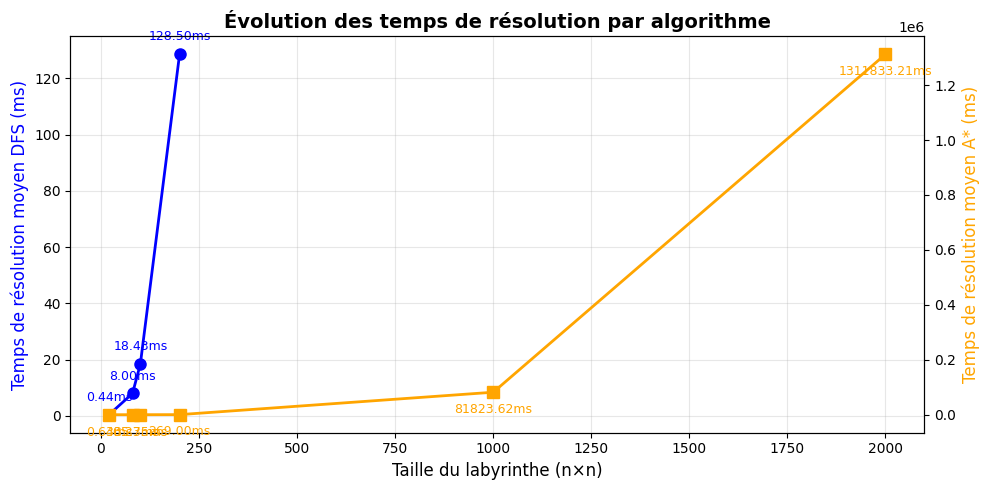

In [ ]:

# Conversion du champ maze
df_solver["maze_size"] = (
    df_solver["maze_size"].astype(str).str.split("x").str[0].astype(int)
)

# Calcul des moyennes par taille et algorithme
moyennes_solve = duckdb.sql("""
SELECT 
    algorithm,
    maze_size,
    AVG(solve_time_ms) as avg_solve_time
FROM df_solver
WHERE maze_size >= 10 
GROUP BY algorithm, maze_size
ORDER BY maze_size
""").df()

# Séparation des algorithmes
dfs = moyennes_solve[moyennes_solve['algorithm'] == 'dfs']
astar = moyennes_solve[moyennes_solve['algorithm'] == 'astar']
# Création de la figure
fig, ax1 = plt.subplots(figsize=(10, 5))

# Axe secondaire
ax2 = ax1.twinx()

# Courbe DFS (axe gauche)
ax1.plot(dfs['maze_size'], dfs['avg_solve_time'],
         'o-', linewidth=2, markersize=8, color='blue', label='DFS')

# Courbe A* (axe droit)
ax2.plot(astar['maze_size'], astar['avg_solve_time'],
         's-', linewidth=2, markersize=8, color='orange', label='A*')

# Labels des axes
ax1.set_xlabel("Taille du labyrinthe (n×n)", fontsize=12)
ax1.set_ylabel("Temps de résolution moyen DFS (ms)", color='blue', fontsize=12)
ax2.set_ylabel("Temps de résolution moyen A* (ms)", color='orange', fontsize=12)

# Titre
plt.title("Évolution des temps de résolution par algorithme", fontsize=14, fontweight="bold")

# Grille
ax1.grid(True, alpha=0.3)

# Affichage des valeurs sur DFS
for i, row in dfs.iterrows():
    ax1.annotate(f'{row["avg_solve_time"]:.2f}ms',
                 (row['maze_size'], row['avg_solve_time']),
                 textcoords="offset points", xytext=(0, 10), ha='center',
                 fontsize=9, color='blue')

# Affichage des valeurs sur A*
for i, row in astar.iterrows():
    ax2.annotate(f'{row["avg_solve_time"]:.2f}ms',
                 (row['maze_size'], row['avg_solve_time']),
                 textcoords="offset points", xytext=(0, -15), ha='center',
                 fontsize=9, color='orange')

plt.tight_layout()
plt.show()



### Interprétation du graphique : Évolution des temps de résolution (DFS vs A*)

### Lecture du graphique
- **Axe des X** : taille du labyrinthe (n×n).  
- **Axe de gauche (bleu)** : temps moyen de résolution **DFS** (en ms).  
- **Axe de droite (orange)** : temps moyen de résolution **A\*** (en ms).  



###  Algorithme DFS
- Pour les petits labyrinthes (≈ 20×20 à 200×200), DFS est **extrêmement rapide** : en moyenne **moins de 130 ms**.  
- La courbe DFS est **plate jusqu’à ~200**, mais aucune valeur n’apparaît pour des labyrinthes de plus grandes tailles.  
  - Cela suggère que DFS n’a pas été exécuté sur de grands labyrinthes.  
- En pratique, DFS ne scale pas bien sur de très grandes tailles, mais cette limite ne se voit pas dans le dataset actuel.


###  Algorithme A*
- Contrairement à DFS, A* montre une **croissance exponentielle** :  
  - ≈ **0.6 ms** pour 20×20  
  - ≈ **260 ms** pour 200×200  
  - ≈ **81 823 ms (≈ 81 s)** pour 1000×1000  
  - ≈ **1 318 633 ms (≈ 22 min)** pour 2000×2000  
- A* devient donc **très coûteux** en temps de calcul dès que la taille du labyrinthe augmente.


###  Comparaison
- **Petits labyrinthes (< 200×200)** : DFS et A* sont proches, DFS est légèrement plus rapide.  
- **Grands labyrinthes (≥ 1000×1000)** : A* explose en temps de calcul, alors que DFS n’apparaît pas dans les données.  
- Cela reflète bien la différence :  
  - **DFS** : rapide mais explore beaucoup inutilement (solution pas forcément optimale).  
  - **A*** : trouve des chemins plus courts, mais devient **lent  pour les grandes tailles**.


 **Conclusion** :  
- DFS est **efficace et rapide** pour des labyrinthes petits à moyens.  
- A* fournit des solutions plus optimales mais est **très coûteux pour les grandes tailles**.  



### comparaison selon la methode de génération

Statistiques par générateur :


,generator,count,mean,std,median,min,max
0,backtracking,396,12.173763,22.177636,1.475,0.17,122.54
1,kruskal,901,6236.501898,81262.985650,16.940,0.15,1643543.37



Statistiques par générateur et algorithme :


,generator,algorithm,count,mean,std,median
0,backtracking,astar,198,21.226667,28.374681,1.475
1,backtracking,dfs,198,3.120859,4.040675,1.810
2,kruskal,astar,423,13248.994728,118282.492604,26.960
3,kruskal,dfs,478,30.885858,50.201969,12.835


C:\Users\ndiay\AppData\Local\Temp\ipykernel_7020\399279882.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='generator', y='solve_time_ms', showfliers=False, palette=['green','red'])


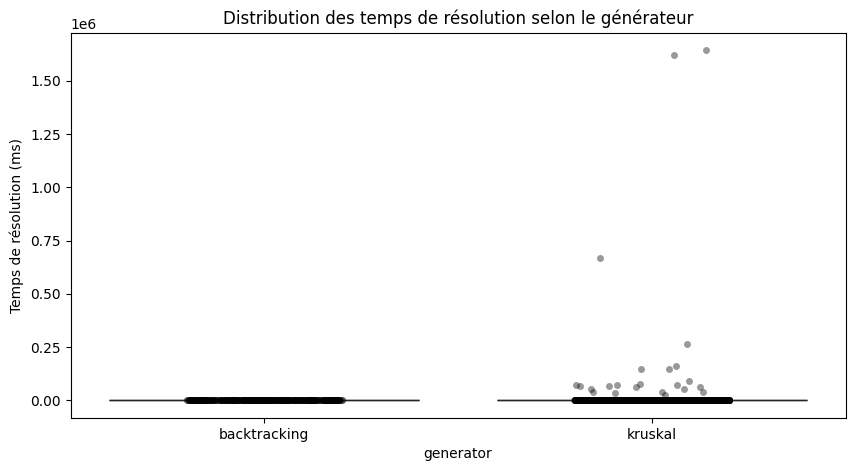

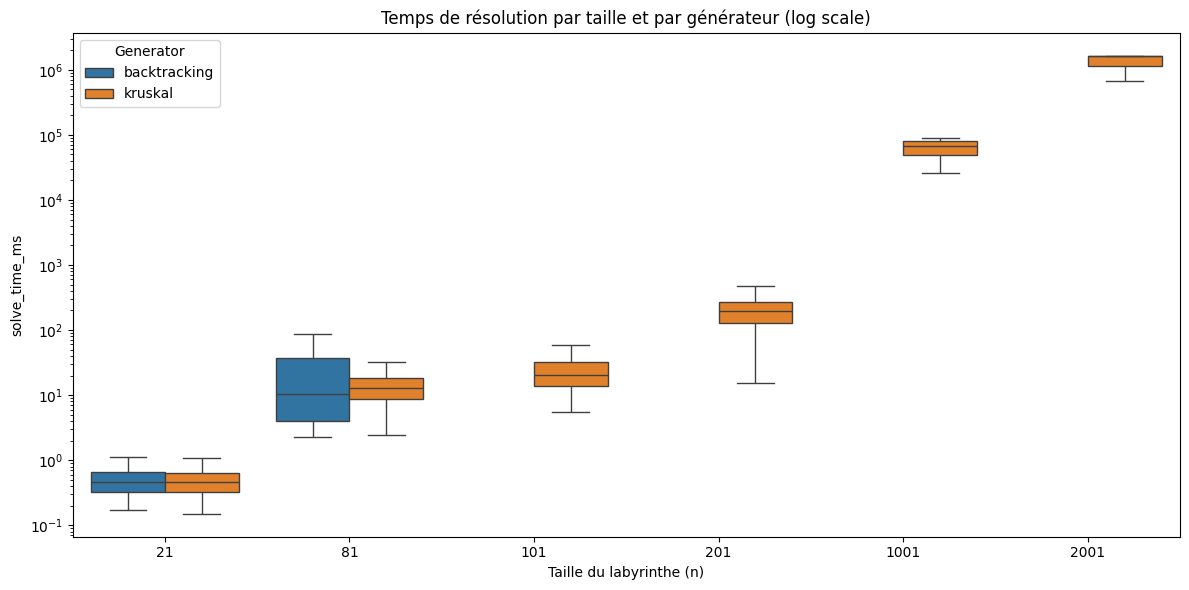

Shapiro backtracking: stat=0.597, p=0.000
Shapiro kruskal: stat=0.049, p=0.000

Levene test (égalité variances): stat=2.318, p=0.128

T-test: t=-1.524, p=0.128
Mann-Whitney U: U=100685.000, p=6.63e-36

ANOVA (log_time ~ generator * algorithm):


,sum_sq,df,F,PR(>F)
C(generator),637.496853,1.0,181.723175,7.506844e-39
C(algorithm),329.093000,1.0,93.810384,1.823204e-21
C(generator):C(algorithm),1.272463,1.0,0.362725,5.471023e-01
Residual,4535.929071,1293.0,NaN,NaN



Guide d'interprétation rapide :
- Si p-value (test t / Mann-Whitney) < 0.05 -> différence significative entre générateurs (sur le temps).
- Dans l'ANOVA, regarder les p-values de C(generator), C(algorithm) et C(generator):C(algorithm).
  - p < 0.05 pour C(generator) -> le générateur influence significativement le temps.
  - p < 0.05 pour interaction -> l'effet du générateur dépend de l'algorithme.


In [ ]:

# Comparaison : impact du générateur sur le temps de résolution


# Prépare les données : création de la colonne générator

df = df_solver.copy()

# normalize maze_size si nécessaire (ex: "21x21" -> 21)
if df['maze_size'].dtype == object:
    df['maze_size_n'] = df['maze_size'].astype(str).str.split('x').str[0].astype(int)
else:
    df['maze_size_n'] = df['maze_size'].astype(int)

# détecter une colonne explicite 'generator' ou 'method'
if 'generator' in df.columns:
    df['generator'] = df['generator'].astype(str)
else:
    # tentative d'inférence simple depuis maze_name
    def infer_generator(name):
        name = str(name).lower()
        if 'kruskal' in name:
            return 'kruskal'
        if 'recursive' in name or 'backtrack' in name or 'backtracking' in name:
            return 'backtracking'
        # ajouter d'autres règles si besoin
        return 'unknown'
    df['generator'] = df['maze_name'].apply(infer_generator)

# garder uniquement les générateurs connus
df = df[df['generator'].isin(['kruskal', 'backtracking'])].copy()

# convertir le temps en ms si besoin
# ici on assume solve_time_ms existe
df['solve_time_ms'] = pd.to_numeric(df['solve_time_ms'], errors='coerce')

#  Statistiques descriptives ---------------------------------------------
grouped = df.groupby(['generator'])['solve_time_ms'].agg([
    ('count','count'), ('mean','mean'), ('std','std'),
    ('median','median'), ('min','min'), ('max','max')
]).reset_index()
print("Statistiques par générateur :")
display(grouped)

# Optionnel : stats par (generator, algorithm)
gp_algo = df.groupby(['generator','algorithm'])['solve_time_ms'].agg(['count','mean','std','median']).reset_index()
print("\nStatistiques par générateur et algorithme :")
display(gp_algo)

#  Visualisations --------------------------------------------------------
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='generator', y='solve_time_ms', showfliers=False, palette=['green','red'])
sns.stripplot(data=df, x='generator', y='solve_time_ms', color='k', alpha=0.4, jitter=0.2)
plt.ylabel("Temps de résolution (ms)")
plt.title("Distribution des temps de résolution selon le générateur")
plt.show()

# on sépare aussi par algorithme :
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='maze_size_n', y='solve_time_ms', hue='generator', showfliers=False)
plt.yscale('log')  # utile si forte dispersion
plt.xlabel("Taille du labyrinthe (n)")
plt.title("Temps de résolution par taille et par générateur (log scale)")
plt.legend(title='Generator')
plt.tight_layout()
plt.show()

#  Tests statistiques (normalité + test approprié) -----------------------
#  Vérifier normalité (Shapiro) sur chaque groupe (attention, Shapiro sensible aux grands échantillons)
for gen, sub in df.groupby('generator'):
    if len(sub['solve_time_ms'].dropna()) >= 3 and len(sub['solve_time_ms'].dropna()) <= 5000:
        stat, p = stats.shapiro(sub['solve_time_ms'].dropna())
        print(f"Shapiro {gen}: stat={stat:.3f}, p={p:.3f}")
    else:
        print(f"Shapiro {gen}: échantillon trop grand/petit pour test fiable (n={len(sub)})")

#  Test d'égalité des variances (Levene)
group_vals = [g['solve_time_ms'].dropna().values for _, g in df.groupby('generator')]
stat, p = stats.levene(*group_vals)
print(f"\nLevene test (égalité variances): stat={stat:.3f}, p={p:.3f}")

#  Choix du test :
# - Si distribution approx normale et variances égales -> t-test (indépendant)
# - Sinon -> Mann-Whitney U (test non-paramétrique)

# t-test (indépendant)
try:
    tstat, tp = stats.ttest_ind(*group_vals, equal_var=(p>0.05))
    print(f"\nT-test: t={tstat:.3f}, p={tp:.3f}")
except Exception as e:
    print("T-test impossible:", e)

# Mann-Whitney
try:
    ustat, up = stats.mannwhitneyu(group_vals[0], group_vals[1], alternative='two-sided')
    print(f"Mann-Whitney U: U={ustat:.3f}, p={up:.3g}")
except Exception as e:
    print("Mann-Whitney impossible:", e)

#  ANOVA à deux facteurs (generator * algorithm) --------------------------
# utile si on veux tester l'effet du générateur ET de l'algorithme et leur interaction
# on prend log(solve_time_ms+1) si distribution très asymétrique
df_anova = df.dropna(subset=['solve_time_ms','generator','algorithm']).copy()
df_anova['log_time'] = np.log1p(df_anova['solve_time_ms'])

model = smf.ols('log_time ~ C(generator) * C(algorithm)', data=df_anova).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA (log_time ~ generator * algorithm):")
display(anova_table)

#  Interprétation automatique (guide)
print("\nGuide d'interprétation rapide :")
print("- Si p-value (test t / Mann-Whitney) < 0.05 -> différence significative entre générateurs (sur le temps).")
print("- Dans l'ANOVA, regarder les p-values de C(generator), C(algorithm) et C(generator):C(algorithm).")
print("  - p < 0.05 pour C(generator) -> le générateur influence significativement le temps.")
print("  - p < 0.05 pour interaction -> l'effet du générateur dépend de l'algorithme.")


## Analyse de l’impact du générateur de labyrinthes sur le temps de résolution

## Visualisation des temps de résolution
- **Backtracking** : les temps de résolution sont globalement faibles et concentrés, même pour des labyrinthes de grande taille.  
- **Kruskal** : les temps de résolution sont beaucoup plus dispersés, avec des valeurs extrêmes (jusqu’à plusieurs millions de ms).  

 Cela suggère que les labyrinthes générés par **Kruskal** sont plus difficiles à résoudre que ceux générés par **Backtracking**.



##  Tests statistiques

### Normalité et homogénéité
- **Shapiro-Wilk** : p < 0.05 → les distributions ne suivent pas la loi normale.  
- **Levene test** : p = 0.128 (> 0.05) → les variances sont homogènes.  

### Comparaison entre générateurs
- **T-test** : p = 0.128 (> 0.05) → pas de différence significative (test paramétrique peu fiable ici).  
- **Mann-Whitney U** : p ≈ 6.63e-36 (< 0.05) → différence **hautement significative** entre Backtracking et Kruskal.  



##  ANOVA (log_time ~ generator * algorithm)

| Facteur                        | F       | p-value          | Interprétation |
|--------------------------------|---------|------------------|----------------|
| **C(generator)**               | 181.72  | 7.5e-39 (<0.05)  | Le générateur influence fortement le temps de résolution. |
| **C(algorithm)**               | 93.81   | 1.8e-21 (<0.05)  | L’algorithme (DFS vs A*) influence aussi fortement. |
| **C(generator) : C(algorithm)**| 0.36    | 0.55 (>0.05)     | Pas d’interaction significative : l’effet du générateur est indépendant de l’algorithme. |



##  Conclusion
1. Les labyrinthes générés par **Kruskal** sont significativement plus difficiles à résoudre que ceux générés par **Backtracking**.  
2. L’**algorithme** de résolution a aussi un effet marqué :  
   - **DFS** reste plus stable et linéaire.  
   - **A*** explose en temps de calcul sur les grands labyrinthes.  
3. Pas d’interaction : l’écart entre Kruskal et Backtracking est présent quel que soit l’algorithme.  

  


# Brouillon = > Ne pas prendre en compte

In [ ]:
# selection des colonnes numériques
num_col = ['generation_time_ms', 'ram_peak_mb', 'file_size_bytes', 'edges_processed', 'union_find_operations']

for column in num_col:
    Q1 = df_kruskal_10[column].quantile(0.25)
    Q3 = df_kruskal_10[column].quantile(0.75)
    IQR = Q3 - Q1 

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 - 1.5*IQR

    outliers = df_kruskal_10[(df_kruskal_10[column] > upper_bound) |
               (df_kruskal_10[column]  < lower_bound)]

    print(f"\n{column}:")
    print(f"  - Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  - Bornes: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  - Outliers détectés: {len(outliers)}")
    
    if len(outliers) > 0:
        print(f"  - Valeurs outliers: {outliers[column].values}")


generation_time_ms:
  - Q1: 1.07, Q3: 1.65, IQR: 0.58
  - Bornes: [0.20, 0.78]
  - Outliers détectés: 100
  - Valeurs outliers: [ 2.02  2.01 15.33  2.19  2.3   1.77  1.35  2.67  1.59  1.92  2.2   1.3
  0.86  0.98  1.43  2.59  1.47  1.37  1.1   1.03  1.14  1.25  0.99  2.5
  1.32  1.48  2.34  1.25  0.88  1.56  2.17  1.42  1.18  0.98  1.38  1.2
  1.14  2.98  1.09  0.91  1.55  0.84  0.84  1.27  1.11  1.26  1.19  1.29
  2.22  0.97  1.32  0.84  0.96  1.14  1.78  1.06  1.2   1.43  1.16  0.86
  1.1   1.29  0.78  0.8   2.03  1.48  1.48  2.01  0.91  1.09  1.32  0.86
  2.59  1.4   2.23  1.6   1.35  0.87  0.82  0.82  1.7   0.94  1.26  1.63
  1.36  1.47  1.26  1.03  2.37  1.07  1.88  1.32  1.11  0.89  1.12  1.32
  0.95  2.54  1.21  1.97]

ram_peak_mb:
  - Q1: 18.00, Q3: 18.01, IQR: 0.01
  - Bornes: [17.98, 17.99]
  - Outliers détectés: 85
  - Valeurs outliers: [17.97 18.   18.   18.   18.   18.   18.   18.   18.   18.   18.   18.
 18.   18.   18.   18.   18.   18.   18.   18.   18.   18.   18.   1

In [ ]:
# selection des colonnes numériques
num_col = ['generation_time_ms', 'ram_peak_mb', 'file_size_bytes', 'edges_processed', 'union_find_operations']

for column in num_col:
    Q1 = df_kruskal_1000[column].quantile(0.25)
    Q3 = df_kruskal_1000[column].quantile(0.75)
    IQR = Q3 - Q1 

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 - 1.5*IQR

    outliers = df_kruskal_1000[(df_kruskal_1000[column] > upper_bound) |
               (df_kruskal_1000[column]  < lower_bound)]

    print(f"\n{column}:")
    print(f"  - Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  - Bornes: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  - Outliers détectés: {len(outliers)}")
    
    if len(outliers) > 0:
        print(f"  - Valeurs outliers: {outliers[column].values}")


generation_time_ms:
  - Q1: 7974.09, Q3: 8469.40, IQR: 495.31
  - Bornes: [7231.13, 7726.44]
  - Outliers détectés: 50
  - Valeurs outliers: [  7947.67   7917.07   7980.88   7990.86   7971.83   7736.82   7856.33
   7954.05   8003.37   8023.8    8042.64   7767.68   7943.84   8073.97
   8028.93   8018.94   8005.09   7863.18   7947.29   8030.15   8250.04
   8177.29   8132.14   7776.34   8112.15   8224.4    8041.29   9767.64
  10055.48   8479.43  10170.42   8130.95   8084.38   8024.92   8054.17
   8017.76   7900.42   8355.62 198485.63   8439.32   8321.86   7821.53
   8668.36  10703.69  11055.26  10778.68  11374.85  10879.34  11327.57
  11573.21]

ram_peak_mb:
  - Q1: 293.71, Q3: 295.73, IQR: 2.01
  - Bornes: [290.69, 292.71]
  - Outliers détectés: 45
  - Valeurs outliers: [294.33 293.66 295.68 295.71 296.63 294.52 295.57 295.55 293.66 295.95
 293.67 294.78 296.01 296.22 298.02 289.68 293.7  295.73 296.73 296.85
 293.64 293.75 296.84 294.36 295.33 294.51 296.45 295.34 294.37 295.46
 294.39

## Recherche de corrélations des variables sur les outliers

In [ ]:


# temps max
max_time = duckdb.sql("""
    SELECT *,
      'max_time'as metric
      from df_kruskal_1000
        where generation_time_ms = (select max(generation_time_ms) FROM df_kruskal_1000)""").df()

# max ram
max_ram = duckdb.sql("""
    SELECT *,
      'max_ram'as metric
    from df_kruskal_1000
    where ram_peak_mb = (select max(ram_peak_mb) FROM df_kruskal_1000)""").df()

# max operations
max_ops = duckdb.sql("""
    SELECT *,
      'max_ops'as metric
    from df_kruskal_1000
    where union_find_operations = (select max(union_find_operations) FROM df_kruskal_1000)""").df()

result = duckdb.sql(""" 
    select * from max_time
    union all
    select * from max_ram
    union all
    select * from max_ops
    """).df()

result

,timestamp,filename,maze_size,seed,algorithm,generation_time_ms,ram_peak_mb,file_size_bytes,backtrack_count,edges_processed,union_find_operations,metric
0,2025-09-16 19:14:33,kruskal_strict_1000_39.txt,1000.0,39.0,kruskal,198485.63,294.39,4008003.0,0.0,1998000.0,8807356.0,max_time
1,2025-09-16 19:11:22,kruskal_strict_1000_16.txt,1000.0,16.0,kruskal,8018.94,298.02,4008003.0,0.0,1998000.0,8720812.0,max_ram
2,2025-09-16 19:11:05,kruskal_strict_1000_14.txt,1000.0,14.0,kruskal,8073.97,296.01,4008003.0,0.0,1998000.0,8922923.0,max_ops


In [ ]:
result = duckdb.sql("""
SELECT *
from df_kruskal_50
where union_find_operations = (
select max(union_find_operations)
from df_kruskal_50)
""").df()
result

,timestamp,filename,maze_size,seed,algorithm,generation_time_ms,ram_peak_mb,file_size_bytes,backtrack_count,edges_processed,union_find_operations
0,2025-09-16 19:01:41,kruskal_strict_50_86.txt,50.0,86.0,kruskal,10.41,18.97,10403.0,0.0,4900.0,21611.0


In [ ]:
result = duckdb.sql("""
SELECT *
from df_kruskal_10
where union_find_operations = (
select max(union_find_operations)
from df_kruskal_10)
""").df()
result

,timestamp,filename,maze_size,seed,algorithm,generation_time_ms,ram_peak_mb,file_size_bytes,backtrack_count,edges_processed,union_find_operations
0,2025-09-16 19:01:40,kruskal_strict_10_43.txt,10.0,43.0,kruskal,0.84,18.0,483.0,0.0,180.0,774.0


### recherche correlation avec la ram

In [ ]:
result = duckdb.sql("""
SELECT *
from df_kruskal_50
where ram_peak_mb = (
select max(ram_peak_mb)
from df_kruskal_50)
""").df()
result

,timestamp,filename,maze_size,seed,algorithm,generation_time_ms,ram_peak_mb,file_size_bytes,backtrack_count,edges_processed,union_find_operations
0,2025-09-16 19:01:41,kruskal_strict_50_79.txt,50.0,79.0,kruskal,10.32,18.97,10403.0,0.0,4900.0,19169.0
1,2025-09-16 19:01:41,kruskal_strict_50_80.txt,50.0,80.0,kruskal,10.00,18.97,10403.0,0.0,4900.0,18806.0
2,2025-09-16 19:01:41,kruskal_strict_50_81.txt,50.0,81.0,kruskal,9.90,18.97,10403.0,0.0,4900.0,19348.0
3,2025-09-16 19:01:41,kruskal_strict_50_82.txt,50.0,82.0,kruskal,14.18,18.97,10403.0,0.0,4900.0,20242.0
4,2025-09-16 19:01:41,kruskal_strict_50_83.txt,50.0,83.0,kruskal,14.94,18.97,10403.0,0.0,4900.0,19417.0
5,2025-09-16 19:01:41,kruskal_strict_50_84.txt,50.0,84.0,kruskal,10.75,18.97,10403.0,0.0,4900.0,19977.0
6,2025-09-16 19:01:41,kruskal_strict_50_85.txt,50.0,85.0,kruskal,9.10,18.97,10403.0,0.0,4900.0,20158.0
7,2025-09-16 19:01:41,kruskal_strict_50_86.txt,50.0,86.0,kruskal,10.41,18.97,10403.0,0.0,4900.0,21611.0
8,2025-09-16 19:01:41,kruskal_strict_50_87.txt,50.0,87.0,kruskal,10.74,18.97,10403.0,0.0,4900.0,18804.0
9,2025-09-16 19:01:41,kruskal_strict_50_88.txt,50.0,88.0,kruskal,9.11,18.97,10403.0,0.0,4900.0,20050.0


In [ ]:
df= pd.read_csv("constructors_metrics.csv")
df_recursive_maze_10 = duckdb.sql("""
SELECT * 
FROM df 
where maze_size = 10 and algorithm= 'recursive_backtracking'
""").df()
df_recursive_maze_10

,timestamp,filename,maze_size,seed,algorithm,generation_time_ms,ram_peak_mb,file_size_bytes,backtrack_count,edges_processed,union_find_operations
0,2025-09-17 19:13:21,recursive_maze_10_1,10.0,1.0,recursive_backtracking,1.16,17.62,483.0,8.0,99.0,0.0
1,2025-09-17 19:13:21,recursive_maze_10_2,10.0,2.0,recursive_backtracking,1.04,17.65,483.0,9.0,99.0,0.0
2,2025-09-17 19:13:21,recursive_maze_10_3,10.0,3.0,recursive_backtracking,1.74,17.65,483.0,8.0,99.0,0.0
3,2025-09-17 19:13:21,recursive_maze_10_4,10.0,4.0,recursive_backtracking,1.73,17.65,483.0,10.0,99.0,0.0
4,2025-09-17 19:13:21,recursive_maze_10_5,10.0,5.0,recursive_backtracking,1.46,17.65,483.0,9.0,99.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
95,2025-09-17 19:13:21,recursive_maze_10_96,10.0,96.0,recursive_backtracking,1.15,17.68,483.0,8.0,99.0,0.0
96,2025-09-17 19:13:21,recursive_maze_10_97,10.0,97.0,recursive_backtracking,0.94,17.68,483.0,7.0,99.0,0.0
97,2025-09-17 19:13:21,recursive_maze_10_98,10.0,98.0,recursive_backtracking,1.14,17.68,483.0,11.0,99.0,0.0
98,2025-09-17 19:13:21,recursive_maze_10_99,10.0,99.0,recursive_backtracking,1.18,17.68,483.0,13.0,99.0,0.0


In [ ]:
# selection des colonnes numériques
num_col = ['generation_time_ms', 'ram_peak_mb', 'file_size_bytes', 'edges_processed', 'union_find_operations']

for column in num_col:
    Q1 = df_recursive_maze_10[column].quantile(0.25)
    Q3 = df_recursive_maze_10[column].quantile(0.75)
    IQR = Q3 - Q1 

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 - 1.5*IQR

    outliers = df_recursive_maze_10[(df_recursive_maze_10[column] > upper_bound) |
               (df_recursive_maze_10[column]  < lower_bound)]

    print(f"\n{column}:")
    print(f"  - Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  - Bornes: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  - Outliers détectés: {len(outliers)}")
    
    if len(outliers) > 0:
        print(f"  - Valeurs outliers: {outliers[column].values}")


generation_time_ms:
  - Q1: 1.10, Q3: 1.73, IQR: 0.63
  - Bornes: [0.15, 0.78]
  - Outliers détectés: 100
  - Valeurs outliers: [1.16 1.04 1.74 1.73 1.46 3.51 1.57 1.33 1.6  1.25 1.53 1.63 1.17 2.56
 1.65 1.25 1.27 1.38 1.64 1.76 1.56 2.69 1.84 1.63 1.98 1.92 1.43 1.98
 1.43 1.2  1.93 1.1  1.77 1.32 1.13 1.78 1.6  1.53 1.43 2.   1.18 1.09
 1.63 1.14 1.19 3.08 1.26 1.05 1.28 9.92 2.45 2.75 1.39 4.27 1.62 4.43
 1.39 1.9  1.03 0.97 2.26 1.14 1.46 0.96 1.73 1.   1.01 1.12 2.01 1.32
 0.96 0.91 1.62 1.36 1.02 1.02 0.94 0.97 1.24 0.91 1.15 1.06 1.07 2.2
 1.05 1.09 0.96 1.1  1.01 1.11 2.63 1.2  1.6  0.98 1.01 1.15 0.94 1.14
 1.18 1.07]

ram_peak_mb:
  - Q1: 17.67, Q3: 17.68, IQR: 0.01
  - Bornes: [17.66, 17.67]
  - Outliers détectés: 85
  - Valeurs outliers: [17.62 17.65 17.65 17.65 17.65 17.65 17.65 17.65 17.67 17.67 17.67 17.67
 17.67 17.67 17.67 17.67 17.67 17.67 17.67 17.67 17.67 17.67 17.67 17.67
 17.67 17.67 17.67 17.68 17.68 17.68 17.68 17.68 17.68 17.68 17.68 17.68
 17.68 17.68 17.68 

In [ ]:
# selection des colonnes numériques
num_col = ['generation_time_ms', 'ram_peak_mb', 'file_size_bytes', 'edges_processed', 'union_find_operations']

for column in num_col:
    Q1 = df_recursive_maze_40[column].quantile(0.25)
    Q3 = df_recursive_maze_40[column].quantile(0.75)
    IQR = Q3 - Q1 

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 - 1.5*IQR

    outliers = df_recursive_maze_40[(df_recursive_maze_40[column] > upper_bound) |
               (df_recursive_maze_40[column]  < lower_bound)]

    print(f"\n{column}:")
    print(f"  - Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  - Bornes: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  - Outliers détectés: {len(outliers)}")
    
    if len(outliers) > 0:
        print(f"  - Valeurs outliers: {outliers[column].values}")


generation_time_ms:
  - Q1: 7.80, Q3: 11.13, IQR: 3.33
  - Bornes: [2.81, 6.14]
  - Outliers détectés: 98
  - Valeurs outliers: [ 7.16  8.9  10.89  6.98  7.75  8.49  6.9   9.51 13.73 12.57 11.72 10.
 11.4   7.78 10.51 10.99 10.74 10.97 14.42  9.25  7.4  10.4   9.93  7.8
  7.38  8.09  7.8   8.85 10.27 12.45 10.19  7.81  7.21  9.3  10.41  7.6
 10.66  9.48  9.33  6.97  8.18  9.25  7.19  8.04  9.34  7.65  7.63  8.27
  6.93  7.81  7.25  9.12 10.67  7.    8.54  9.82  7.59  7.6  11.31 11.24
 10.98 11.22  7.49  8.36 31.9  10.94 13.39 10.78  7.83  8.93 11.18  9.4
  7.19 21.02  7.04 12.3  16.4  10.81 13.41 11.52 11.61 12.3   8.1   9.92
 10.95 12.14 11.85 14.64  8.43  7.07  8.99  8.18  7.38 11.79 12.58  8.43
  8.11 16.87]

ram_peak_mb:
  - Q1: 18.21, Q3: 18.27, IQR: 0.06
  - Bornes: [18.12, 18.18]
  - Outliers détectés: 82
  - Valeurs outliers: [18.09 18.2  18.2  18.2  18.2  18.2  18.21 18.21 18.21 18.21 18.21 18.21
 18.21 18.21 18.21 18.21 18.21 18.21 18.21 18.21 18.21 18.21 18.21 18.21
 18.22 

In [ ]:
max(generation_time_ms) as max_time_ms, min(generation_time_ms) as min_time_ms, avg(generation_time_ms) as avg_time_ms 

SyntaxError: invalid syntax (1409424787.py, line 1)

In [ ]:
kurskal et recursive_backtracking: les pic de ram les plus importants sont toujours sur les derniers enregistrements d'une serie
kurskal: 3 outliers détectés Kurskal_10 =>15.33, kurskal_50 =>47.26 kuskal_1000 => 198485.63 
recursive_backtracking: 2 outliers détectés recursive_maze_40 =>31.9 et recursive_maze_10 =>9.92
kurskal: après étude approfondie aucune répercution de ces valeurs extrême sur ram_peak_mb, union_find_operations. Dans ces conditions nous décidons de remplacer ces valeurs par la moyenne de generation_time_ms

In [ ]:
# création data frame dfs taille 20
df= pd.read_csv("constructors_metrics.csv")
df_recursive_maze_20 = duckdb.sql("""
SELECT * 
FROM df 
where maze_size = 20 and algorithm= 'recursive_backtracking'
""").df()
df_recursive_maze_20

,timestamp,filename,maze_size,seed,algorithm,generation_time_ms,ram_peak_mb,file_size_bytes,backtrack_count,edges_processed,union_find_operations
0,2025-09-20 13:14:42,recursive_maze_20_1,20.0,1.0,recursive_backtracking,2.50,17.71,1763.0,42.0,399.0,0.0
1,2025-09-20 13:14:42,recursive_maze_20_2,20.0,2.0,recursive_backtracking,2.38,17.76,1763.0,37.0,399.0,0.0
2,2025-09-20 13:14:42,recursive_maze_20_3,20.0,3.0,recursive_backtracking,2.32,17.76,1763.0,44.0,399.0,0.0
3,2025-09-20 13:14:42,recursive_maze_20_4,20.0,4.0,recursive_backtracking,3.91,17.76,1763.0,39.0,399.0,0.0
4,2025-09-20 13:14:42,recursive_maze_20_5,20.0,5.0,recursive_backtracking,3.60,17.76,1763.0,41.0,399.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
95,2025-09-20 13:14:42,recursive_maze_20_96,20.0,96.0,recursive_backtracking,2.51,17.82,1763.0,38.0,399.0,0.0
96,2025-09-20 13:14:42,recursive_maze_20_97,20.0,97.0,recursive_backtracking,2.39,17.82,1763.0,37.0,399.0,0.0
97,2025-09-20 13:14:42,recursive_maze_20_98,20.0,98.0,recursive_backtracking,4.40,17.82,1763.0,45.0,399.0,0.0
98,2025-09-20 13:14:42,recursive_maze_20_99,20.0,99.0,recursive_backtracking,3.10,17.82,1763.0,38.0,399.0,0.0


In [ ]:
max_recursive_20 = duckdb.sql("""
SELECT max("generation_time_ms")
from df_recursive_maze_20
""").df()
max_recursive_20

,max(generation_time_ms)
0,5.75


In [ ]:
# création data frame dfs taille 30
df= pd.read_csv("constructors_metrics.csv")
df_recursive_maze_30 = duckdb.sql("""
SELECT * 
FROM df 
where maze_size = 30 and algorithm= 'recursive_backtracking'
""").df()
df_recursive_maze_30

,timestamp,filename,maze_size,seed,algorithm,generation_time_ms,ram_peak_mb,file_size_bytes,backtrack_count,edges_processed,union_find_operations
0,2025-09-20 13:14:42,recursive_maze_30_1,30.0,1.0,recursive_backtracking,5.00,17.91,3843.0,94.0,899.0,0.0
1,2025-09-20 13:14:42,recursive_maze_30_2,30.0,2.0,recursive_backtracking,9.99,17.91,3843.0,92.0,899.0,0.0
2,2025-09-20 13:14:42,recursive_maze_30_3,30.0,3.0,recursive_backtracking,6.92,17.92,3843.0,89.0,899.0,0.0
3,2025-09-20 13:14:42,recursive_maze_30_4,30.0,4.0,recursive_backtracking,6.21,17.96,3843.0,85.0,899.0,0.0
4,2025-09-20 13:14:42,recursive_maze_30_5,30.0,5.0,recursive_backtracking,7.88,17.97,3843.0,89.0,899.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
95,2025-09-20 13:14:43,recursive_maze_30_96,30.0,96.0,recursive_backtracking,5.08,18.01,3843.0,88.0,899.0,0.0
96,2025-09-20 13:14:43,recursive_maze_30_97,30.0,97.0,recursive_backtracking,7.11,18.01,3843.0,87.0,899.0,0.0
97,2025-09-20 13:14:43,recursive_maze_30_98,30.0,98.0,recursive_backtracking,5.59,18.01,3843.0,92.0,899.0,0.0
98,2025-09-20 13:14:43,recursive_maze_30_99,30.0,99.0,recursive_backtracking,7.33,18.01,3843.0,93.0,899.0,0.0


In [ ]:
max_recursive_30 = duckdb.sql("""
SELECT max("generation_time_ms")
from df_recursive_maze_30
""").df()
max_recursive_30

,max(generation_time_ms)
0,18.86


In [ ]:
mean_recursive_30 = duckdb.sql("""
SELECT mean("generation_time_ms")
from df_recursive_maze_30
""").df()
mean_recursive_30

,mean(generation_time_ms)
0,6.5259


In [ ]:
count_max_recursive_30 = duckdb.sql("""
SELECT filename
from df_recursive_maze_30
where generation_time_ms > 14
""").df()
count_max_recursive_30

,filename
0,recursive_maze_30_30
1,recursive_maze_30_33


In [ ]:
# création data frame dfs taille 30
df= pd.read_csv("constructors_metrics.csv")
df_kruskal_30 = duckdb.sql("""
SELECT * 
FROM df 
where maze_size = 30 and algorithm= 'kruskal'
""").df()
df_kruskal_30

,timestamp,filename,maze_size,seed,algorithm,generation_time_ms,ram_peak_mb,file_size_bytes,backtrack_count,edges_processed,union_find_operations
0,2025-09-20 13:18:10,kruskal_strict_30_1.txt,30.0,1.0,kruskal,3.64,18.18,3843.0,0.0,1740.0,6672.0
1,2025-09-20 13:18:10,kruskal_strict_30_2.txt,30.0,2.0,kruskal,3.76,18.19,3843.0,0.0,1740.0,6491.0
2,2025-09-20 13:18:10,kruskal_strict_30_3.txt,30.0,3.0,kruskal,4.54,18.19,3843.0,0.0,1740.0,7153.0
3,2025-09-20 13:18:10,kruskal_strict_30_4.txt,30.0,4.0,kruskal,7.25,18.19,3843.0,0.0,1740.0,6998.0
4,2025-09-20 13:18:10,kruskal_strict_30_5.txt,30.0,5.0,kruskal,12.39,18.19,3843.0,0.0,1740.0,6602.0
...,...,...,...,...,...,...,...,...,...,...,...
95,2025-09-20 13:18:11,kruskal_strict_30_96.txt,30.0,96.0,kruskal,3.81,18.19,3843.0,0.0,1740.0,6483.0
96,2025-09-20 13:18:11,kruskal_strict_30_97.txt,30.0,97.0,kruskal,3.55,18.19,3843.0,0.0,1740.0,7120.0
97,2025-09-20 13:18:11,kruskal_strict_30_98.txt,30.0,98.0,kruskal,3.41,18.19,3843.0,0.0,1740.0,6704.0
98,2025-09-20 13:18:11,kruskal_strict_30_99.txt,30.0,99.0,kruskal,3.75,18.19,3843.0,0.0,1740.0,7098.0


In [ ]:
max_kruskal_30 = duckdb.sql("""
SELECT max("generation_time_ms")
from df_kruskal_30
""").df()
max_kruskal_30

,max(generation_time_ms)
0,12.39


In [ ]:
mean_kruskal_30 = duckdb.sql("""
SELECT mean("generation_time_ms")
from df_kruskal_30
""").df()
mean_kruskal_30

,mean(generation_time_ms)
0,4.1058


In [ ]:
# création data frame dfs taille 30
df= pd.read_csv("constructors_metrics.csv")
df_kruskal_20 = duckdb.sql("""
SELECT * 
FROM df 
where maze_size = 20 and algorithm= 'kruskal'
""").df()
df_kruskal_20

,timestamp,filename,maze_size,seed,algorithm,generation_time_ms,ram_peak_mb,file_size_bytes,backtrack_count,edges_processed,union_find_operations
0,2025-09-20 13:18:10,kruskal_strict_20_1.txt,20.0,1.0,kruskal,2.22,17.91,1763.0,0.0,760.0,2969.0
1,2025-09-20 13:18:10,kruskal_strict_20_2.txt,20.0,2.0,kruskal,2.08,17.94,1763.0,0.0,760.0,2661.0
2,2025-09-20 13:18:10,kruskal_strict_20_3.txt,20.0,3.0,kruskal,1.90,17.94,1763.0,0.0,760.0,2913.0
3,2025-09-20 13:18:10,kruskal_strict_20_4.txt,20.0,4.0,kruskal,2.63,17.94,1763.0,0.0,760.0,2908.0
4,2025-09-20 13:18:10,kruskal_strict_20_5.txt,20.0,5.0,kruskal,15.53,17.94,1763.0,0.0,760.0,2858.0
...,...,...,...,...,...,...,...,...,...,...,...
95,2025-09-20 13:18:10,kruskal_strict_20_96.txt,20.0,96.0,kruskal,2.01,17.96,1763.0,0.0,760.0,3084.0
96,2025-09-20 13:18:10,kruskal_strict_20_97.txt,20.0,97.0,kruskal,1.74,17.96,1763.0,0.0,760.0,2836.0
97,2025-09-20 13:18:10,kruskal_strict_20_98.txt,20.0,98.0,kruskal,2.31,17.96,1763.0,0.0,760.0,2716.0
98,2025-09-20 13:18:10,kruskal_strict_20_99.txt,20.0,99.0,kruskal,2.00,17.96,1763.0,0.0,760.0,2650.0


In [ ]:
max_kruskal_20 = duckdb.sql("""
SELECT max("generation_time_ms")
from df_kruskal_20
""").df()
max_kruskal_20

,max(generation_time_ms)
0,15.53


In [ ]:
mean_kruskal_20 = duckdb.sql("""
SELECT mean("generation_time_ms")
from df_kruskal_20
""").df()
mean_kruskal_20

,mean(generation_time_ms)
0,2.4349


In [ ]:
mean_kruskal_20 = duckdb.sql("""
SELECT filename
from df_kruskal_20
where generation_time_ms > 8
""").df()
mean_kruskal_20

,filename
0,kruskal_strict_20_5.txt


In [ ]:
df_clean = duckdb.sql("""
UPDATE df
SET generation_time = select mean(generation_time) from df_kruskal_20
WHERE filename = kruskal_strict_20_5.txt
""").df()

df_clean = duckdb.sql("""
UPDATE df
SET generation_time = mean(generation_time)
WHERE filename = kruskal_strict_20_5.txt
""").df()
